In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
mnist = load_digits()

In [2]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

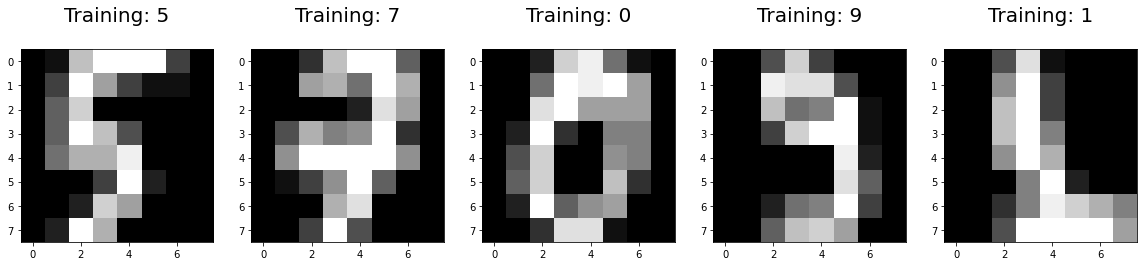

In [3]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
from sklearn.cluster import KMeans

# Determining the number of clusters needed
total_clusters = len(np.unique(train_lbl))

kmeans = KMeans(n_clusters=total_clusters)
kmeans.fit(train_img)

KMeans(n_clusters=10)

In [5]:
# Now we determine the cluster labels and what number they correspond to:
def retreive_info(cluster_labels, y_train):
    reference_labels = {}
    
    for i in range(len(np.unique(cluster_labels))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    
    return reference_labels

In [6]:
labels = retreive_info(kmeans.labels_, train_lbl)
print(labels)

{0: 2, 1: 5, 2: 9, 3: 4, 4: 6, 5: 3, 6: 0, 7: 1, 8: 7, 9: 1}


In [7]:
# converting the cluster labels to the actual labels
number_labels = np.random.rand(len(kmeans.labels_))
for i in range (len(kmeans.labels_)):
    number_labels[i] = labels[kmeans.labels_[i]]
    
print(number_labels[:20].astype('int'))
print(train_lbl[:20])

[5 7 0 9 2 6 5 9 7 4 3 9 0 3 6 4 6 3 2 6]
[5 7 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6]


In [8]:
# checking the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels, train_lbl))

0.7935064935064935


In [9]:
# we will improve the accuracy by increasing the number of clusters in the kmeans algorithm

# will try different number of clusters:
# for 10, got an accuracy of 0.7782101167315175
# for 100, got an accuracy of 0.9727626459143969
# for 256, got an accuracy of 0.980544747081712
# for 400, got an accuracy of 0.9844357976653697
# for 500, got an accuracy of 0.9883268482490273
# for 1000, got an accuracy of 0.9883268482490273

kmeans2 = KMeans(n_clusters=100)
kmeans2.fit(train_img)

KMeans(n_clusters=100)

In [10]:
labels = retreive_info(kmeans2.labels_, train_lbl)

In [11]:
number_labels = np.random.rand(len(kmeans2.labels_))
for i in range (len(kmeans2.labels_)):
    number_labels[i] = labels[kmeans2.labels_[i]]
    
print(number_labels[:20].astype('int'))
print(train_lbl[:20])

[5 7 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6]
[5 7 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6]


In [12]:
# accuracy on training data
print(accuracy_score(number_labels, train_lbl))

0.974025974025974


In [13]:
# now we test accuracy on test images
predictions = kmeans2.predict(test_img)

# we convert the cluster value into the corresponding digit
for i in range (len(predictions)):
    predictions[i] = labels[predictions[i]]
    
print(accuracy_score(predictions, test_lbl))

0.9727626459143969
